In [26]:
%pylab
%matplotlib inline

rcParams['figure.figsize'] = 12,8

Using matplotlib backend: MacOSX
Populating the interactive namespace from numpy and matplotlib


# Single-Layer Back Propagation Networks

* **Regression** - $K = 1$
* **Classification** - $K > 1$
  - $K$ target measurements $Y_k \in [0,1]$ representing probabilities of class $k$
  - $M$ derived features $Z_m$: linear combinations of inputs $X_1,\ldots,X_p$
  - $Y_k$ ends up being linear combinations of the $Z_m$
  
  i.e. it all boils down to linear algebra (surprise!)

## Classification

Given functions $g_M : \mathbb{R} \to [0,1]$ and an activation function $\sigma : \mathbb{R} \to [0,1]$ (usually chosen to be the sigmoid function) we consider the system

$$
\begin{align}
Z_m    &= \sigma\left(\alpha_{0m} + \alpha_m^T X\right), & m &= 1,\ldots,M \\
f_k(X) &= g_k\left( \beta_{0k} + \beta_k^T Z \right),    & k &= 1,\ldots,k,
\end{align}
$$

where $Z = (Z_1,\ldots,Z_m)$.

* $\alpha_{0m}, \beta_{0k}$ are bias terms. Alternatively, $X = (X_0=1,X_1,\ldots,X_p)$ and $Z = (Z_0=1,Z_1,\ldots,Z_M)$ can be used in the formulae

  $$
  \begin{align}
  Z_m    &= \sigma\left(\alpha_m^T X\right), & m &= 0,\ldots,M \\
  f_k(X) &= g_k\left(\beta_k^T Z \right),    & k &= 0,\ldots,k.
  \end{align}
  $$
  
* in $K$-class classification people use

  $$
  g_k(T) = \frac{e^{T_k}}{\sum_{l=1^K} e^{T_l}}
  $$
  
  
## Finding Weights $\alpha,\beta$

Let

$$
\alpha = [\alpha_0 \; \alpha_1 \; \ldots \; \alpha_M] \in \mathbb{R}^{(p+1) \times (M+1)},
\quad
\beta = [\beta_0 \; \beta_1 \; \ldots \; \beta_K] \in \mathbb{R}^{(M+1) \times (K+1)}.
$$

Let $\theta$ denote the complete set of $\alpha_{ij}$ and $\beta_{ij}$. To find optimal $\theta$ we minimize the square error
$$
R(\theta) = \sum_{k=1}^K\sum_{i=1}^N(y_{ik} - f_k(x_i))^2.
$$
*(Personal note: what is $y_{ik}$?)* Use your favorite method to do so. A standard approach is gradient descent.

Easy calculus aside, the updates for each $\alpha_{ml}$ and $\beta_{km}$ are given below

$$
\begin{align*}
\alpha_{ml}^{(r+1)}
&=
\alpha_{ml}^{(r)} - \gamma_y \sum_{i=1}^N \frac{\partial R_i}{\partial \alpha_{ml}^{(r)}}, \\
\beta_{km}^{(r+1)}
&=
\beta_{km}^{(r)} - \gamma_y \sum_{i=1}^N \frac{\partial R_i}{\partial \beta_{km}^{(r)}}.
\end{align*}
$$

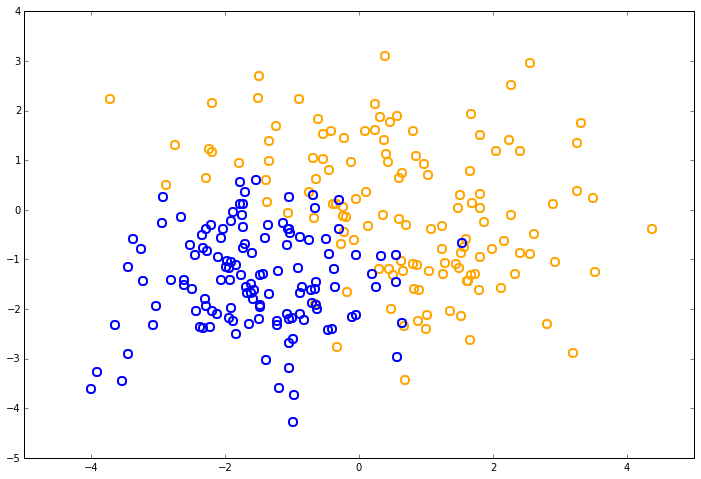

In [88]:
n = 256
p = 2

# generate random training data
seed(1)
orange1 = [2,1]*randn(n/4,p) + [0,1]
orange2 = [1,1]*randn(n/4,p) + [1,-1]
orange  = append(orange1,orange2,axis=0)
blue = [1,1]*randn(n/2,p) + [-1.5,-1.5]

# training data
x = append(orange,blue,axis=0)
y = append(zeros(n/2),ones(n/2),axis=0)

# plot the training data
kwds = {'marker':'o', 'markersize':8, 'fillstyle':'none',
        'markeredgewidth':2, 'linestyle':'none'}
plot(orange[:,0], orange[:,1], color='orange', **kwds)
plot(blue[:,0], blue[:,1], color='blue', **kwds)

In [ ]:
@vectorize
def sigma(v):
    return 1/(1+exp(-v))

@vectorize
def dsigma(v):
    u = exp(-v)
    return u/(1+u)**2
    
def g(T,k=0):
    return exp(T[k])/sum(exp(T))